# Getting started with QPlot

To follow this tutorial, you can of course copy the code below into your favorite editor or IDE. Alternatively, you can download it as a <a href="tutorial1.ipynb">Jupyter notebook</a>.

If you use QPlot inside a Jupyter notebook, the graphs you draw appear inline. Alternatively, QPlot also works well in combination with Python consoles. In such environments, QPlot opens its own interactive plot windows which add functionality for measuring and close-up inspection. Notebook users (including those who use the interactive console of VS Code) can achieve the same benefit by adding the line `qp.ion()` after importing the module. In that case, the graph appears both in its own window and in the notebook.


## Your first plot

Let's verify that QPlot is correctly installed by creating a very simple plot. 

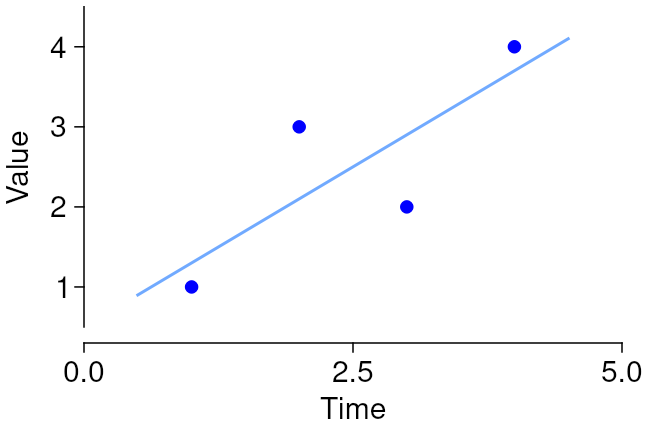

In [1]:
import qplot as qp

xx = [1, 2, 3, 4]
yy = [1, 3, 2, 4]

qp.figure(3, 2)
qp.pen('b')
qp.marker('o', 4)
qp.mark(xx, yy)
qp.pen('469', 1)
qp.plot([0.5, 4.5], [0.9, 4.1])
qp.pen()
qp.xaxis("Time", [0, 2.5, 5], lambda x: f"{x:.1f}", y=.3)
qp.yaxis("Value", [1, 2, 3, 4], lim=[0.5, 4.5])
qp.shrink()
qp.save("myfirstgraph.pdf")

Let's go over that line by line:

* The `qp.figure` command creates a figure. You must tell QPlot the width and height of your figure. By default, these are understood to be specified in inches, but you can pass `unit="cm"` or `unit="mm"` if you prefer.

* The `qp.pen` command selects the color for subsequent plotting. Colors may be specified as (r,g,b) triplets (with each component between 0.0 and 1.0), or as a single-letter color name, as shown here. Additional arguments to the `qp.pen` command can be used to specify other aspects of line style.

* The `qp.marker` command selects a symbol for plotting points. `'o'` selects a circle, `4` specifies the size, in points (1/72 of an inch). Additional arguments can be used, among other things, to specify whether solid or open symbols should be used.

* The `qp.mark` command plots individual points. It uses the styles defined by the preceding `qp.marker` and `qp.pen` commands. 

* The color argument to `qp.pen` may also be specified as an "rgb" triplet in string form, where each digit specifies the value for one color channel on a 0–9 scale. The second argument to `qp.pen` specifies the line width, in points.

* The `qp.plot` command plots solid lines. Here I plotted the linear fit to the data. If you `pip install physfit`,  you can do that without manual calculations:

      f = physfit.fit("linear", xx, yy)
      qp.plot([0.5, 4.5], f([0.5, 4.5]))

* Without arguments, `qp.pen()` restores the default 0.5-point-wide black pen.

* The `qp.xaxis` and `qp.yaxis` commands renders x- and y-axes, respectively. These commands take many optional arguments; only some are demonstrated here. The first two arguments specify the axis title and location of the ticks. The optional third specifies the labels for those ticks. This may be a list, or, as shown here, a lambda that takes a tick coordinate as an argument. The `y` argument to `qp.xaxis` and the `x` argument to `qp.yaxis` specify the location of the axis along the other dimension, if zero is not what you want. The `lim` argument specifies the end points of the axis, if those arenot to coincide with the first and last ticks. QPlot will try to guess reasonable defaults for tick positions if not given, but your own esthetic sense is generally to be preferred.

* The real magic happens in `qp.shrink`. This adjusts the mapping of data coordinates to position on the page such that all textual annotations neatly fit within the figure size specified in the `qp.figure` invocation.

* Finally, the `qp.save` command saves your graph in a file for use in other software. QPlot can also render to png and many other image formats.

## Same thing, but as a bar plot, and slightly smaller



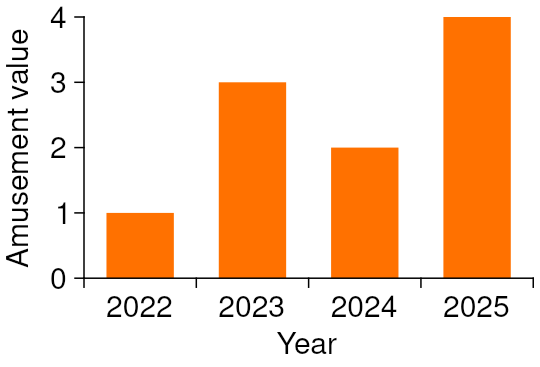

In [2]:
qp.figure("bars", 2.5, 1.7)
qp.brush('940')
qp.pen('none')
qp.bars(xx, yy, w=.6)
qp.pen()
qp.xcaxis("Year", xx, lambda x: x + 2021)
qp.yaxis("Amusement value", x=0.5)
qp.shrink()
qp.save()

Again, line by line:

* Providing a name as a first argument to `qp.figure` specifies a windows title. This is especially useful in interactive mode, as it prevents new windows from popping up every time you rerun the code section, but it also allows using `qp.save` with simpler syntax. In the notebook, the window title is not displayed.

* The `qp.brush` command specifies the fill color for bars and other area features. Often, we don't want an outline around those, so we set the pen to `'none'`. Note that this is different from specifying `None` for the color, which simply leaves the previous color unchanged.

* The `qp.bars` command takes a *width* argument in addition to x- and y-coordinates. The width of the bars is specified in absolute data units, not relative to the increment between adjacent bars.

* The `qp.xcaxis` command is very similar to the `qp.xaxis` command, except that it places its tick marks centered between the specified positions, while still placing labels at the specified positions themselves. This often looks better for bar plots.

* If you don't specify a filename to `qp.save`, it uses the window title and produces a pdf file.

## Numpy!

This section is a work in progress.